In [1]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Cопряженное к распределению Бернулли - бета-распределение.

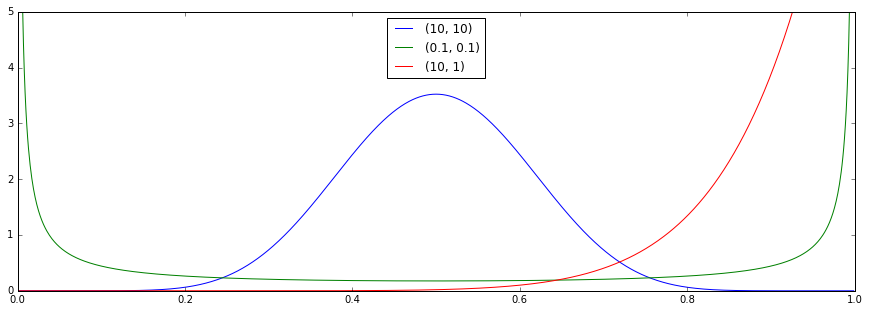

In [8]:
grid = np.arange(0, 1, 0.001)

plt.figure(figsize=(15, 5))
plt.plot(grid, sps.beta.pdf(grid, 10, 10), label='(10, 10)')
plt.plot(grid, sps.beta.pdf(grid, 0.1, 0.1), label='(0.1, 0.1)')
plt.plot(grid, sps.beta.pdf(grid, 10, 1), label='(10, 1)')

plt.legend(loc='best')
plt.ylim(0, 5)
plt.show()

"Монета скорее честна" при $(10, 10)$, "Монета нечестная" при $(0.1, 0.1)$, <br> "Монета скорее нечестная, перевес в сторону герба" при $(10, 1)$

Байесовская оценка с параметрами априорного распределения $(\alpha, \beta)   -  $<br>$ p = \frac{\alpha + \Sigma x_i}{\alpha + \beta + n}$

In [81]:
def dev_est(p, a):
    sample = sps.bernoulli(p).rvs(20)
    cumsum = np.cumsum(sample)    
    grid = np.array(range(20))
    
    plt.figure(figsize=(15,5))
    max_lkh_est = np.array([abs(p - cumsum[i] / (i + 1)) for i in range (20)])
    plt.plot(grid, max_lkh_est, label = "Max_likelihood")
             
    shift_scale = [[10, 10], [0.1, 0.1], [10, 1]]
    for i in range(len(shift_scale)):
        plt.plot(grid, np.array([abs(p - (shift_scale[i][0] + cumsum[j]) / 
                                         (shift_scale[i][0] + shift_scale[i][1] + j)
                                    ) for j in range(20)]),
                label = '(%.1f %.1f)' % (shift_scale[i][0], shift_scale[i][1]))

    plt.legend()

    plt.ylim(0, a)
    plt.show()

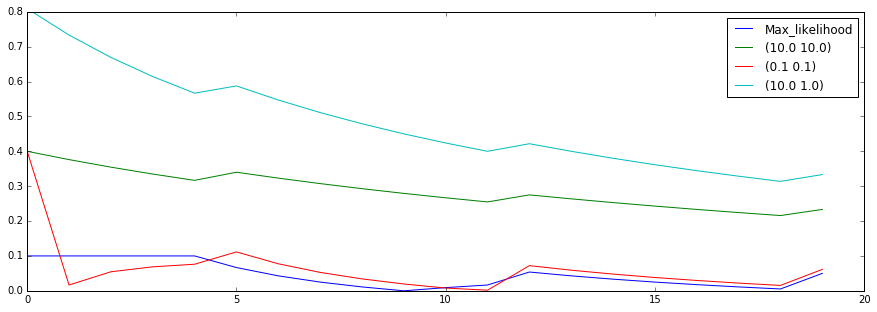

In [82]:
dev_est(0.1, 0.8)

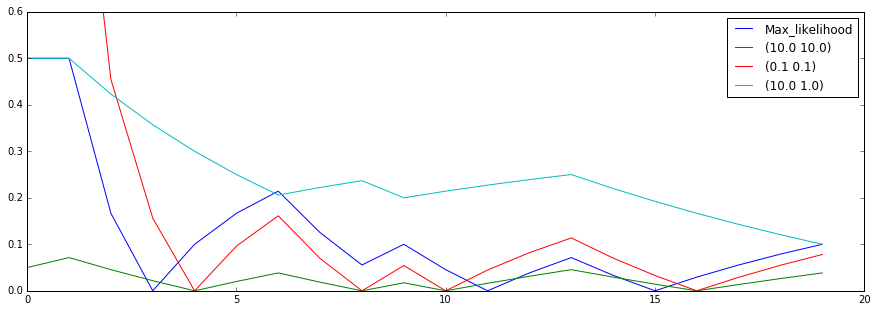

In [83]:
dev_est(0.5, 0.6)

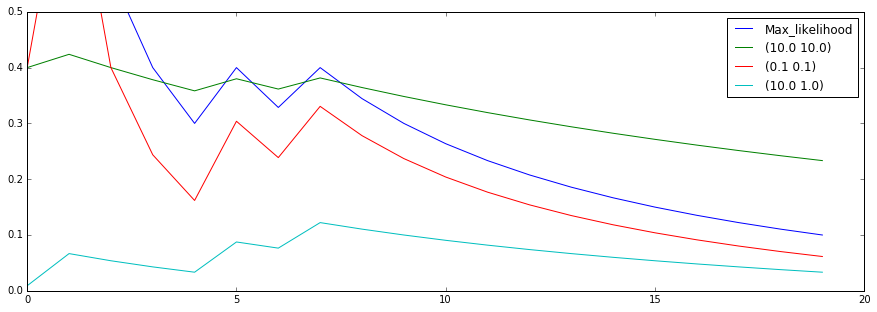

In [88]:
dev_est(0.9, 0.5)

Лучшими оценками являются байесовские оценки, распределение которых изначально соответствовало тому или иному поведению монеты.